In [1]:
# Importing the libraries 

import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns
%matplotlib inline

# Ignore harmless warnings 


import warnings 
warnings.filterwarnings("ignore")

# Set to display all the columns in dataset

pd.set_option("display.max_columns", None)

# Import psql to run queries 

import pandasql as psql

In [2]:
train = pd.read_csv(r"C:\Users\Chandra Shekhar\Documents\Internship\internProject\archive (2)\train.csv", header=0)

train_bk=train.copy()
train.head()


,Unnamed: 0,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,0,70172,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,3,1,5,3,5,5,4,3,4,4,5,5,25,18.0,neutral or dissatisfied
1,1,5047,Male,disloyal Customer,25,Business travel,Business,235,3,2,3,3,1,3,1,1,1,5,3,1,4,1,1,6.0,neutral or dissatisfied
2,2,110028,Female,Loyal Customer,26,Business travel,Business,1142,2,2,2,2,5,5,5,5,4,3,4,4,4,5,0,0.0,satisfied
3,3,24026,Female,Loyal Customer,25,Business travel,Business,562,2,5,5,5,2,2,2,2,2,5,3,1,4,2,11,9.0,neutral or dissatisfied
4,4,119299,Male,Loyal Customer,61,Business travel,Business,214,3,3,3,3,4,5,5,3,3,4,4,3,3,3,0,0.0,satisfied


In [3]:
test = pd.read_csv(r"C:\Users\Chandra Shekhar\Documents\Internship\internProject\archive (2)\test.csv", header=0)
test.head()

,Unnamed: 0,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,0,19556,Female,Loyal Customer,52,Business travel,Eco,160,5,4,3,4,3,4,3,5,5,5,5,2,5,5,50,44.0,satisfied
1,1,90035,Female,Loyal Customer,36,Business travel,Business,2863,1,1,3,1,5,4,5,4,4,4,4,3,4,5,0,0.0,satisfied
2,2,12360,Male,disloyal Customer,20,Business travel,Eco,192,2,0,2,4,2,2,2,2,4,1,3,2,2,2,0,0.0,neutral or dissatisfied
3,3,77959,Male,Loyal Customer,44,Business travel,Business,3377,0,0,0,2,3,4,4,1,1,1,1,3,1,4,0,6.0,satisfied
4,4,36875,Female,Loyal Customer,49,Business travel,Eco,1182,2,3,4,3,4,1,2,2,2,2,2,4,2,4,0,20.0,satisfied


In [4]:
train.shape


(103904, 25)

In [5]:
# Check if there are duplicate rows in the dataset

train.duplicated().any()

False

In [6]:
# Display the dataset information

train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103904 entries, 0 to 103903
Data columns (total 25 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   Unnamed: 0                         103904 non-null  int64  
 1   id                                 103904 non-null  int64  
 2   Gender                             103904 non-null  object 
 3   Customer Type                      103904 non-null  object 
 4   Age                                103904 non-null  int64  
 5   Type of Travel                     103904 non-null  object 
 6   Class                              103904 non-null  object 
 7   Flight Distance                    103904 non-null  int64  
 8   Inflight wifi service              103904 non-null  int64  
 9   Departure/Arrival time convenient  103904 non-null  int64  
 10  Ease of Online booking             103904 non-null  int64  
 11  Gate location                      1039

In [7]:
# Display all the columns in dataset

train.columns

Index(['Unnamed: 0', 'id', 'Gender', 'Customer Type', 'Age', 'Type of Travel',
       'Class', 'Flight Distance', 'Inflight wifi service',
       'Departure/Arrival time convenient', 'Ease of Online booking',
       'Gate location', 'Food and drink', 'Online boarding', 'Seat comfort',
       'Inflight entertainment', 'On-board service', 'Leg room service',
       'Baggage handling', 'Checkin service', 'Inflight service',
       'Cleanliness', 'Departure Delay in Minutes', 'Arrival Delay in Minutes',
       'satisfaction'],
      dtype='object')

In [8]:
# Displaying Duplicate values with in dataset

train_dup = train[train.duplicated(keep='last')]
train_dup

,Unnamed: 0,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction


In [9]:
# Displaying Duplicate values with in dataset

test_dup = test[test.duplicated(keep='last')]
test_dup

,Unnamed: 0,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction


In [10]:
# Display the missing values of different variables
train.isnull().sum()

Unnamed: 0                             0
id                                     0
Gender                                 0
Customer Type                          0
Age                                    0
Type of Travel                         0
Class                                  0
Flight Distance                        0
Inflight wifi service                  0
Departure/Arrival time convenient      0
Ease of Online booking                 0
Gate location                          0
Food and drink                         0
Online boarding                        0
Seat comfort                           0
Inflight entertainment                 0
On-board service                       0
Leg room service                       0
Baggage handling                       0
Checkin service                        0
Inflight service                       0
Cleanliness                            0
Departure Delay in Minutes             0
Arrival Delay in Minutes             310
satisfaction    

In [11]:
train = train.rename(columns = {'Arrival Delay in Minutes': 'ADM'}, inplace = False)
test = test.rename(columns = {'Arrival Delay in Minutes': 'ADM'}, inplace = False)

In [12]:
# Use SimpleImputer to address missing values

from sklearn.impute import SimpleImputer

imputer_str = SimpleImputer(missing_values=np.nan, strategy='most_frequent', fill_value=None, verbose=0,
                            copy=True, add_indicator=False)
train['ADM'] = imputer_str.fit_transform(train[['ADM']])

In [13]:
#converting all categorical variables into integer variables
from sklearn.preprocessing import LabelEncoder
LE=LabelEncoder()

train["Gender"]=LE.fit_transform(train["Gender"])
train["Customer Type"]=LE.fit_transform(train["Customer Type"])
train["Type of Travel"]=LE.fit_transform(train["Type of Travel"])
train["Class"]=LE.fit_transform(train["Class"])
train["satisfaction"]=LE.fit_transform(train["satisfaction"])
train_bk["satisfaction"]=LE.fit_transform(train_bk["satisfaction"])
test["Gender"]=LE.fit_transform(test["Gender"])
test["Customer Type"]=LE.fit_transform(test["Customer Type"])
test["Type of Travel"]=LE.fit_transform(test["Type of Travel"])
test["Class"]=LE.fit_transform(test["Class"])
test["satisfaction"]=LE.fit_transform(test["satisfaction"])

In [14]:
# Display the dataset information

train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103904 entries, 0 to 103903
Data columns (total 25 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   Unnamed: 0                         103904 non-null  int64  
 1   id                                 103904 non-null  int64  
 2   Gender                             103904 non-null  int32  
 3   Customer Type                      103904 non-null  int32  
 4   Age                                103904 non-null  int64  
 5   Type of Travel                     103904 non-null  int32  
 6   Class                              103904 non-null  int32  
 7   Flight Distance                    103904 non-null  int64  
 8   Inflight wifi service              103904 non-null  int64  
 9   Departure/Arrival time convenient  103904 non-null  int64  
 10  Ease of Online booking             103904 non-null  int64  
 11  Gate location                      1039

In [15]:
col_names = ['Gender', 'Customer Type', 'Type of Travel', 'Class', 'satisfaction']


for col in col_names:
    
    print(train[col].value_counts())   
    
# loyal customer vs disloyal customer - data skewed here 
# remove eco plus

0    52727
1    51177
Name: Gender, dtype: int64
0    84923
1    18981
Name: Customer Type, dtype: int64
0    71655
1    32249
Name: Type of Travel, dtype: int64
0    49665
1    46745
2     7494
Name: Class, dtype: int64
0    58879
1    45025
Name: satisfaction, dtype: int64


In [16]:
col_names = ['Gender', 'Customer Type', 'Type of Travel', 'Class', 'satisfaction']


for col in col_names:
    
    print(test[col].value_counts())   
    
# loyal customer vs disloyal customer - data skewed here 
# remove eco plus

0    13172
1    12804
Name: Gender, dtype: int64
0    21177
1     4799
Name: Customer Type, dtype: int64
0    18038
1     7938
Name: Type of Travel, dtype: int64
0    12495
1    11564
2     1917
Name: Class, dtype: int64
0    14573
1    11403
Name: satisfaction, dtype: int64


In [17]:
train.head()

,Unnamed: 0,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,ADM,satisfaction
0,0,70172,1,0,13,1,2,460,3,4,3,1,5,3,5,5,4,3,4,4,5,5,25,18.0,0
1,1,5047,1,1,25,0,0,235,3,2,3,3,1,3,1,1,1,5,3,1,4,1,1,6.0,0
2,2,110028,0,0,26,0,0,1142,2,2,2,2,5,5,5,5,4,3,4,4,4,5,0,0.0,1
3,3,24026,0,0,25,0,0,562,2,5,5,5,2,2,2,2,2,5,3,1,4,2,11,9.0,0
4,4,119299,1,0,61,0,0,214,3,3,3,3,4,5,5,3,3,4,4,3,3,3,0,0.0,1


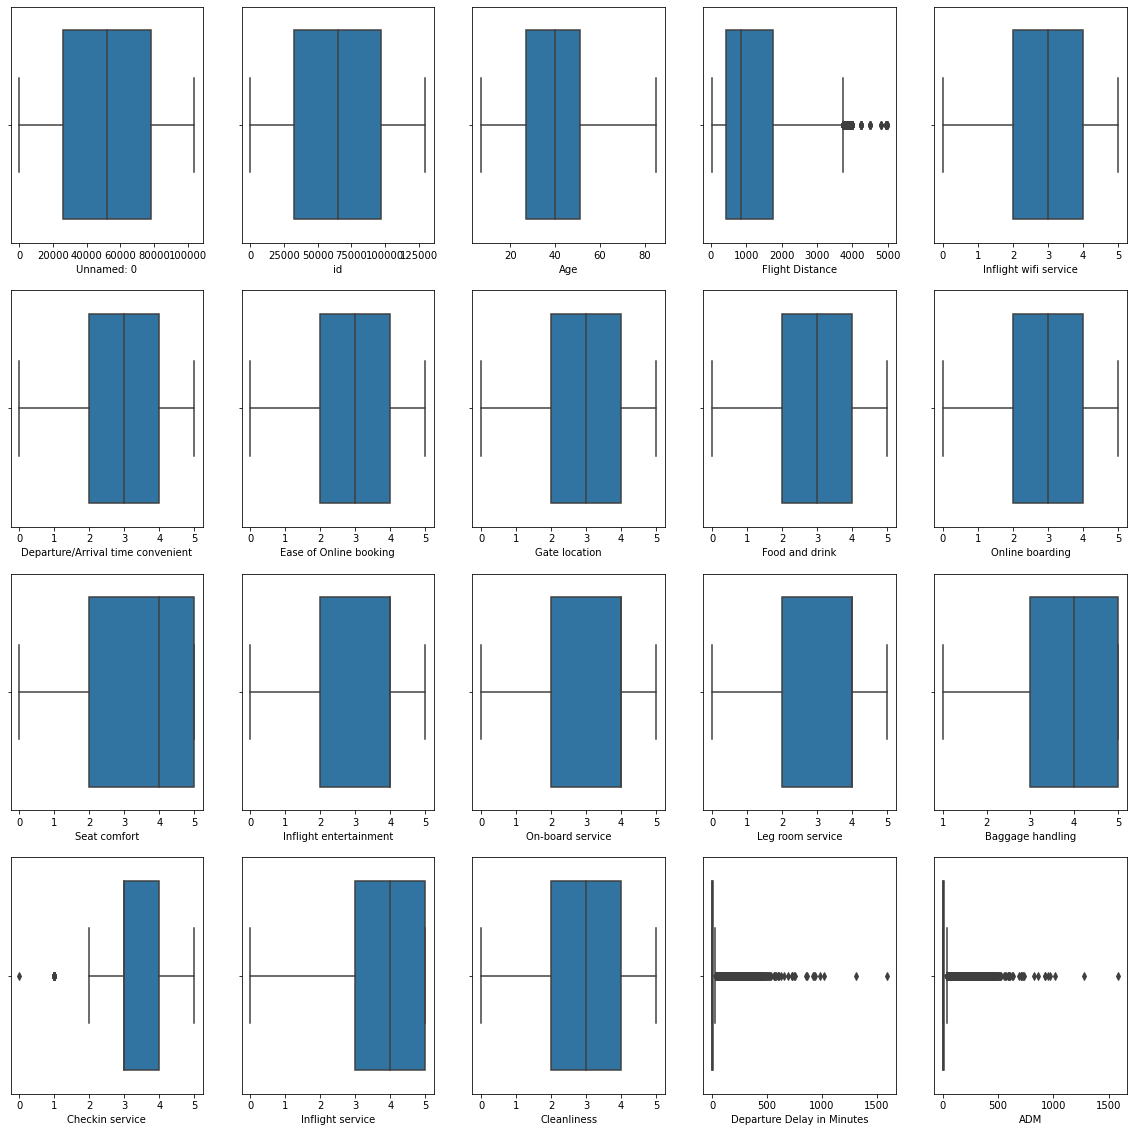

In [18]:
#Are there any outliers

df_num = train.select_dtypes(include=["float64","int64"])
fig, ax = plt.subplots(nrows = 4, ncols = 5, figsize=(20, 20))
for variable, subplot in zip(df_num.columns, ax.flatten()):
    sns.boxplot(train[variable], ax = subplot)
plt.show()

In [19]:
Q1 = train['Flight Distance'].quantile(.25)
Q3 = train['Flight Distance'].quantile(.75)
IQR = Q3 - Q1
lower = Q1 - 1.5 * IQR
upper = Q3 + 1.5 * IQR
train = train[train['Flight Distance'] >= lower] 
train = train[train['Flight Distance'] <=upper]

In [20]:
Q1 = train['Departure Delay in Minutes'].quantile(.20)
Q3 = train['Departure Delay in Minutes'].quantile(.80)
IQR = Q3 - Q1
lower = Q1 - 1.5 * IQR
upper = Q3 + 1.5 * IQR
train = train[train['Departure Delay in Minutes'] >= lower] 
train = train[train['Departure Delay in Minutes'] <=upper] 

Q1 = train['ADM'].quantile(.20)
Q3 = train['ADM'].quantile(.80)
IQR = Q3 - Q1
lower = Q1 - 1.5 * IQR
upper = Q3 + 1.5 * IQR
train = train[train['ADM'] >= lower] 
train = train[train['ADM'] <=upper]

In [21]:
# Identify the independent and Target variables

IndepVar = []
for col in train.columns:
    if col != 'satisfaction':
        IndepVar.append(col)

TargetVar = 'satisfaction'

x_train = train[IndepVar]
y_train = train[TargetVar]

In [22]:
# Identify the independent and Target variables

IndepVar = []
for col in train.columns:
    if col != 'satisfaction':
        IndepVar.append(col)

TargetVar = 'satisfaction'

x_test = test[IndepVar]
y_test = test[TargetVar]

In [23]:
print("class 0: ",y_test.value_counts()[0])
print("class 1: ",y_test.value_counts()[1])
print("class 0 : class 1=",(y_test.value_counts()[0]/y_test.value_counts()[1]))

class 0:  14573
class 1:  11403
class 0 : class 1= 1.27799701832851


In [24]:
col = ['Gender', 'Customer Type', 'Type of Travel', 'Class']
x_test = test.drop(['satisfaction', 'id', 'Unnamed: 0', 'ADM'], axis=1)

y_test = test['satisfaction']

x_train = train.drop(['satisfaction', 'id', 'Unnamed: 0', 'ADM'], axis=1)

y_train = train['satisfaction']


In [25]:
from sklearn.preprocessing import MinMaxScaler

mmscaler = MinMaxScaler(feature_range=(0, 1))

x_train[col] = mmscaler.fit_transform(x_train[col])
x_train = pd.DataFrame(x_train)

x_test[col] = mmscaler.fit_transform(x_test[col])
x_test = pd.DataFrame(x_test)

In [26]:
# Load the result dataset

EMResults = pd.read_csv(r"C:\Users\Chandra Shekhar\Documents\Internship\HTResults.csv", header=0)
EMResults

,Model Name,True Positive,False Negative,False Positive,True Negative,Accuracy,Precision,Recall,F1 Score,Specificity,MCC,ROC_AUC_Score,Balanced Accuracy


Model Name:  LogisticRegression()
Confusion matrix : 
 [[ 8236  3167]
 [ 2159 12414]]
Outcome values : 
 8236 3167 2159 12414
Classification report : 
               precision    recall  f1-score   support

           1       0.79      0.72      0.76     11403
           0       0.80      0.85      0.82     14573

    accuracy                           0.79     25976
   macro avg       0.79      0.79      0.79     25976
weighted avg       0.79      0.79      0.79     25976

Accuracy : 79.5 %
Precision : 79.2 %
Recall : 72.2 %
F1 Score : 0.756
Specificity or True Negative Rate : 85.2 %
Balanced Accuracy : 78.7 %
MCC : 0.582
roc_auc_score: 0.787


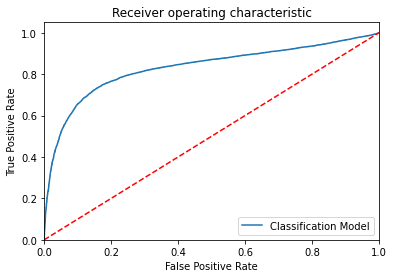

-----------------------------------------------------------------------------------------------------
Model Name:  DecisionTreeClassifier()
Confusion matrix : 
 [[10699   704]
 [  803 13770]]
Outcome values : 
 10699 704 803 13770
Classification report : 
               precision    recall  f1-score   support

           1       0.93      0.94      0.93     11403
           0       0.95      0.94      0.95     14573

    accuracy                           0.94     25976
   macro avg       0.94      0.94      0.94     25976
weighted avg       0.94      0.94      0.94     25976

Accuracy : 94.2 %
Precision : 93.0 %
Recall : 93.8 %
F1 Score : 0.934
Specificity or True Negative Rate : 94.5 %
Balanced Accuracy : 94.2 %
MCC : 0.882
roc_auc_score: 0.942


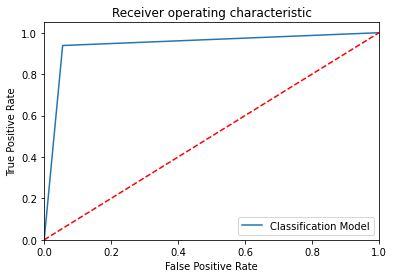

-----------------------------------------------------------------------------------------------------
Model Name:  RandomForestClassifier()
Confusion matrix : 
 [[10746   657]
 [  313 14260]]
Outcome values : 
 10746 657 313 14260
Classification report : 
               precision    recall  f1-score   support

           1       0.97      0.94      0.96     11403
           0       0.96      0.98      0.97     14573

    accuracy                           0.96     25976
   macro avg       0.96      0.96      0.96     25976
weighted avg       0.96      0.96      0.96     25976

Accuracy : 96.3 %
Precision : 97.2 %
Recall : 94.2 %
F1 Score : 0.957
Specificity or True Negative Rate : 97.9 %
Balanced Accuracy : 96.0 %
MCC : 0.924
roc_auc_score: 0.96


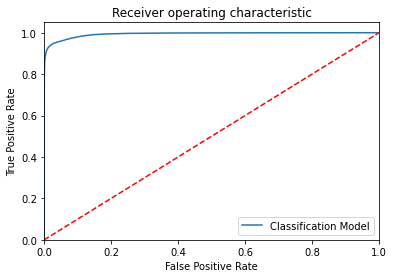

-----------------------------------------------------------------------------------------------------
Model Name:  ExtraTreesClassifier()
Confusion matrix : 
 [[10735   668]
 [  352 14221]]
Outcome values : 
 10735 668 352 14221
Classification report : 
               precision    recall  f1-score   support

           1       0.97      0.94      0.95     11403
           0       0.96      0.98      0.97     14573

    accuracy                           0.96     25976
   macro avg       0.96      0.96      0.96     25976
weighted avg       0.96      0.96      0.96     25976

Accuracy : 96.1 %
Precision : 96.8 %
Recall : 94.1 %
F1 Score : 0.955
Specificity or True Negative Rate : 97.6 %
Balanced Accuracy : 95.8 %
MCC : 0.92
roc_auc_score: 0.959


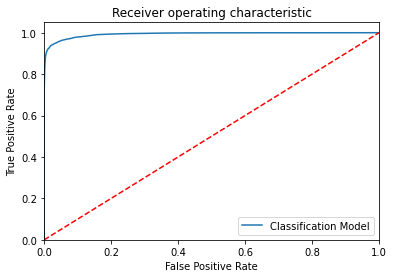

-----------------------------------------------------------------------------------------------------
Model Name:  KNeighborsClassifier()
Confusion matrix : 
 [[ 7670  3733]
 [ 2682 11891]]
Outcome values : 
 7670 3733 2682 11891
Classification report : 
               precision    recall  f1-score   support

           1       0.74      0.67      0.71     11403
           0       0.76      0.82      0.79     14573

    accuracy                           0.75     25976
   macro avg       0.75      0.74      0.75     25976
weighted avg       0.75      0.75      0.75     25976

Accuracy : 75.3 %
Precision : 74.1 %
Recall : 67.3 %
F1 Score : 0.705
Specificity or True Negative Rate : 81.6 %
Balanced Accuracy : 74.4 %
MCC : 0.495
roc_auc_score: 0.744


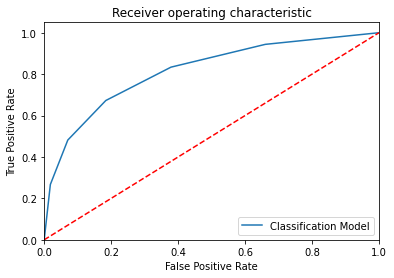

-----------------------------------------------------------------------------------------------------
Model Name:  BaggingClassifier(n_estimators=100)
Confusion matrix : 
 [[10730   673]
 [  355 14218]]
Outcome values : 
 10730 673 355 14218
Classification report : 
               precision    recall  f1-score   support

           1       0.97      0.94      0.95     11403
           0       0.95      0.98      0.97     14573

    accuracy                           0.96     25976
   macro avg       0.96      0.96      0.96     25976
weighted avg       0.96      0.96      0.96     25976

Accuracy : 96.0 %
Precision : 96.8 %
Recall : 94.1 %
F1 Score : 0.954
Specificity or True Negative Rate : 97.6 %
Balanced Accuracy : 95.8 %
MCC : 0.92
roc_auc_score: 0.958


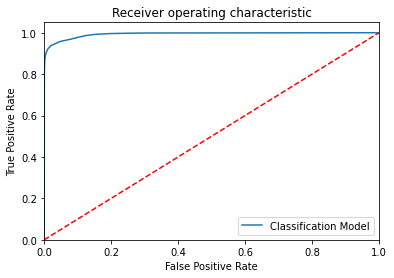

-----------------------------------------------------------------------------------------------------
Model Name:  GradientBoostingClassifier()
Confusion matrix : 
 [[10568   835]
 [  649 13924]]
Outcome values : 
 10568 835 649 13924
Classification report : 
               precision    recall  f1-score   support

           1       0.94      0.93      0.93     11403
           0       0.94      0.96      0.95     14573

    accuracy                           0.94     25976
   macro avg       0.94      0.94      0.94     25976
weighted avg       0.94      0.94      0.94     25976

Accuracy : 94.3 %
Precision : 94.2 %
Recall : 92.7 %
F1 Score : 0.934
Specificity or True Negative Rate : 95.5 %
Balanced Accuracy : 94.1 %
MCC : 0.884
roc_auc_score: 0.941


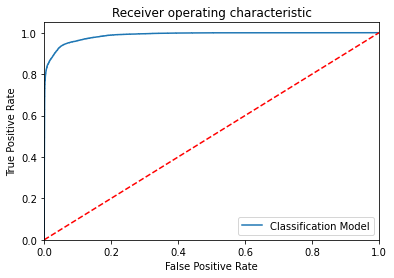

-----------------------------------------------------------------------------------------------------
Model Name:  LGBMClassifier()
Confusion matrix : 
 [[10755   648]
 [  292 14281]]
Outcome values : 
 10755 648 292 14281
Classification report : 
               precision    recall  f1-score   support

           1       0.97      0.94      0.96     11403
           0       0.96      0.98      0.97     14573

    accuracy                           0.96     25976
   macro avg       0.97      0.96      0.96     25976
weighted avg       0.96      0.96      0.96     25976

Accuracy : 96.4 %
Precision : 97.4 %
Recall : 94.3 %
F1 Score : 0.958
Specificity or True Negative Rate : 98.0 %
Balanced Accuracy : 96.2 %
MCC : 0.927
roc_auc_score: 0.962


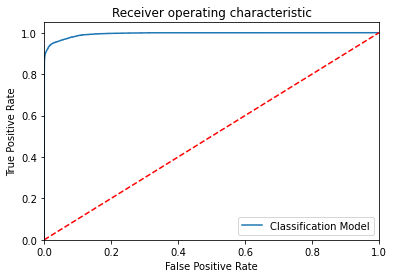

-----------------------------------------------------------------------------------------------------
Model Name:  GaussianNB()
Confusion matrix : 
 [[ 8860  2543]
 [ 1402 13171]]
Outcome values : 
 8860 2543 1402 13171
Classification report : 
               precision    recall  f1-score   support

           1       0.86      0.78      0.82     11403
           0       0.84      0.90      0.87     14573

    accuracy                           0.85     25976
   macro avg       0.85      0.84      0.84     25976
weighted avg       0.85      0.85      0.85     25976

Accuracy : 84.8 %
Precision : 86.3 %
Recall : 77.7 %
F1 Score : 0.818
Specificity or True Negative Rate : 90.4 %
Balanced Accuracy : 84.0 %
MCC : 0.691
roc_auc_score: 0.84


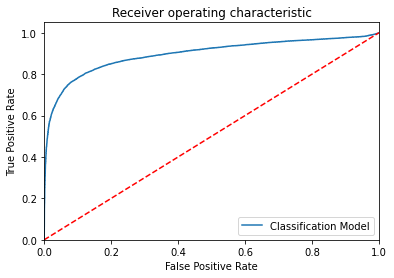

-----------------------------------------------------------------------------------------------------


In [27]:
# Build the Calssification models and compare the results

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.ensemble import BaggingClassifier

from sklearn.ensemble import GradientBoostingClassifier
import lightgbm as lgb

# Create objects of classification algorithm with default hyper-parameters

ModelLR = LogisticRegression()
ModelDC = DecisionTreeClassifier()
ModelRF = RandomForestClassifier()
ModelET = ExtraTreesClassifier()
ModelSVM = SVC(probability=True)

modelBAG = BaggingClassifier(base_estimator=None, n_estimators=100, max_samples=1.0, max_features=1.0,
                             bootstrap=True, bootstrap_features=False, oob_score=False, warm_start=False,
                             n_jobs=None, random_state=None, verbose=0)

ModelGB = GradientBoostingClassifier(loss='deviance', learning_rate=0.1, n_estimators=100, subsample=1.0, 
                                     criterion='friedman_mse', min_samples_split=2, min_samples_leaf=1, 
                                     min_weight_fraction_leaf=0.0, max_depth=3, min_impurity_decrease=0.0,
                                      init=None, random_state=None,
                                     max_features=None, verbose=0, max_leaf_nodes=None, warm_start=False,
                                     validation_fraction=0.1, n_iter_no_change=None, tol=0.0001, ccp_alpha=0.0)
ModelLGB = lgb.LGBMClassifier()
ModelGNB = GaussianNB()

ModelKNN = KNeighborsClassifier(n_neighbors=5)

# Evalution matrix for all the algorithms

MM = [ModelLR, ModelDC, ModelRF, ModelET, ModelKNN, modelBAG, ModelGB, ModelLGB, ModelGNB]
for models in MM:
    
    # Fit the model
    
    models.fit(x_train, y_train)
    
    # Prediction
    
    y_pred = models.predict(x_test)
    y_pred_prob = models.predict_proba(x_test)
    
    # Print the model name
    
    print('Model Name: ', models)
    
    # confusion matrix in sklearn

    from sklearn.metrics import confusion_matrix
    from sklearn.metrics import classification_report

    # actual values

    actual = y_test

    # predicted values

    predicted = y_pred

    # confusion matrix

    matrix = confusion_matrix(actual,predicted, labels=[1,0],sample_weight=None, normalize=None)
    print('Confusion matrix : \n', matrix)

    # outcome values order in sklearn

    tp, fn, fp, tn = confusion_matrix(actual,predicted,labels=[1,0]).reshape(-1)
    print('Outcome values : \n', tp, fn, fp, tn)

    # classification report for precision, recall f1-score and accuracy

    C_Report = classification_report(actual,predicted,labels=[1,0])

    print('Classification report : \n', C_Report)

    # calculating the metrics

    sensitivity = round(tp/(tp+fn), 3);
    specificity = round(tn/(tn+fp), 3);
    accuracy = round((tp+tn)/(tp+fp+tn+fn), 3);
    balanced_accuracy = round((sensitivity+specificity)/2, 3);
    
    precision = round(tp/(tp+fp), 3);
    f1Score = round((2*tp/(2*tp + fp + fn)), 3);

    # Matthews Correlation Coefficient (MCC). Range of values of MCC lie between -1 to +1. 
    # A model with a score of +1 is a perfect model and -1 is a poor model

    from math import sqrt

    mx = (tp+fp) * (tp+fn) * (tn+fp) * (tn+fn)
    MCC = round(((tp * tn) - (fp * fn)) / sqrt(mx), 3)

    print('Accuracy :', round(accuracy*100, 2),'%')
    print('Precision :', round(precision*100, 2),'%')
    print('Recall :', round(sensitivity*100,2), '%')
    print('F1 Score :', f1Score)
    print('Specificity or True Negative Rate :', round(specificity*100,2), '%'  )
    print('Balanced Accuracy :', round(balanced_accuracy*100, 2),'%')
    print('MCC :', MCC)

    # Area under ROC curve 

    from sklearn.metrics import roc_curve, roc_auc_score

    print('roc_auc_score:', round(roc_auc_score(actual, predicted), 3))
    
    # ROC Curve
    
    from sklearn.metrics import roc_auc_score
    from sklearn.metrics import roc_curve
    logit_roc_auc = roc_auc_score(actual, predicted)
    fpr, tpr, thresholds = roc_curve(actual, models.predict_proba(x_test)[:,1])
    plt.figure()
    # plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
    plt.plot(fpr, tpr, label= 'Classification Model' % logit_roc_auc)
    plt.plot([0, 1], [0, 1],'r--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic')
    plt.legend(loc="lower right")
    plt.savefig('Log_ROC')
    plt.show()
    print('-----------------------------------------------------------------------------------------------------')
    #----------------------------------------------------------------------------------------------------------
    new_row = {'Model Name' : models,
               'True Positive' : tp, 
               'False Negative' : fn, 
               'False Positive' : fp,
               'True Negative' : tn,
               'Accuracy' : accuracy,
               'Precision' : precision,
               'Recall' : sensitivity,
               'F1 Score' : f1Score,
               'Specificity' : specificity,
               'MCC':MCC,
               'ROC_AUC_Score':roc_auc_score(actual, predicted),
               'Balanced Accuracy':balanced_accuracy}
    EMResults = EMResults.append(new_row, ignore_index=True)
    #----------------------------------------------------------------------------------------------------------

In [28]:
EMResults

,Model Name,True Positive,False Negative,False Positive,True Negative,Accuracy,Precision,Recall,F1 Score,Specificity,MCC,ROC_AUC_Score,Balanced Accuracy
0,LogisticRegression(),8236,3167,2159,12414,0.795,0.792,0.722,0.756,0.852,0.582,0.787058,0.787
1,DecisionTreeClassifier(),10699,704,803,13770,0.942,0.93,0.938,0.934,0.945,0.882,0.94158,0.942
2,"(DecisionTreeClassifier(max_features='auto', r...",10746,657,313,14260,0.963,0.972,0.942,0.957,0.979,0.924,0.960453,0.96
3,"(ExtraTreeClassifier(random_state=1839253590),...",10735,668,352,14221,0.961,0.968,0.941,0.955,0.976,0.92,0.958632,0.958
4,KNeighborsClassifier(),7670,3733,2682,11891,0.753,0.741,0.673,0.705,0.816,0.495,0.744296,0.744
5,(DecisionTreeClassifier(random_state=123992776...,10730,673,355,14218,0.96,0.968,0.941,0.954,0.976,0.92,0.95831,0.958
6,([DecisionTreeRegressor(criterion='friedman_ms...,10568,835,649,13924,0.943,0.942,0.927,0.934,0.955,0.884,0.94112,0.941
7,LGBMClassifier(),10755,648,292,14281,0.964,0.974,0.943,0.958,0.98,0.927,0.961568,0.962
8,GaussianNB(),8860,2543,1402,13171,0.848,0.863,0.777,0.818,0.904,0.691,0.840392,0.84


In [29]:


# Hyperparametr tuning with RandomizedSearchCV

from sklearn.model_selection import RandomizedSearchCV

# splitter in Decision Tree

splitter = ['best', 'random']

# Number of features to consider at every split

max_features = ['auto', 'sqrt','log2']

# Maximum number of levels in tree

max_depth = [int(x) for x in np.linspace(10, 1000,10)]

# Minimum number of samples required to split a node

min_samples_split = [2, 5, 10,14]

# Minimum number of samples required at each leaf node

min_samples_leaf = [1, 2, 4,6,8]

# Create the random grid

Random_Grid = {
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'criterion':['entropy','gini']}

print(Random_Grid)

{'max_features': ['auto', 'sqrt', 'log2'], 'max_depth': [10, 120, 230, 340, 450, 560, 670, 780, 890, 1000], 'min_samples_split': [2, 5, 10, 14], 'min_samples_leaf': [1, 2, 4, 6, 8], 'criterion': ['entropy', 'gini']}


In [30]:

from sklearn.ensemble import RandomForestClassifier

ModelRF = RandomForestClassifier()

ModelRF_RandomCV=RandomizedSearchCV(estimator=ModelRF, param_distributions=Random_Grid, n_iter=100, cv=3,
                                    verbose=2, random_state=100,n_jobs=-1)
### fit the randomized model

ModelRF_RandomCV.fit(x_train,y_train)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


RandomizedSearchCV(cv=3, estimator=RandomForestClassifier(), n_iter=100,
                   n_jobs=-1,
                   param_distributions={'criterion': ['entropy', 'gini'],
                                        'max_depth': [10, 120, 230, 340, 450,
                                                      560, 670, 780, 890,
                                                      1000],
                                        'max_features': ['auto', 'sqrt',
                                                         'log2'],
                                        'min_samples_leaf': [1, 2, 4, 6, 8],
                                        'min_samples_split': [2, 5, 10, 14]},
                   random_state=100, verbose=2)

In [31]:
ModelRF_RandomCV.best_params_

{'min_samples_split': 2,
 'min_samples_leaf': 1,
 'max_features': 'sqrt',
 'max_depth': 340,
 'criterion': 'entropy'}

In [32]:
HTResults = pd.read_csv(r"C:\Users\Chandra Shekhar\Documents\Internship\HTResults.csv", header=0)
HTResults.head()

,Model Name,True Positive,False Negative,False Positive,True Negative,Accuracy,Precision,Recall,F1 Score,Specificity,MCC,ROC_AUC_Score,Balanced Accuracy


Confusion matrix : 
 [[10745   658]
 [  322 14251]]
Outcome values : 
 10745 658 322 14251
Classification report : 
               precision    recall  f1-score   support

           1       0.97      0.94      0.96     11403
           0       0.96      0.98      0.97     14573

    accuracy                           0.96     25976
   macro avg       0.96      0.96      0.96     25976
weighted avg       0.96      0.96      0.96     25976

Accuracy : 96.2 %
Precision : 97.1 %
Recall : 94.2 %
F1 Score : 0.956
Specificity or True Negative Rate : 97.8 %
Balanced Accuracy : 96.0 %
MCC : 0.923
roc_auc_score: 0.96


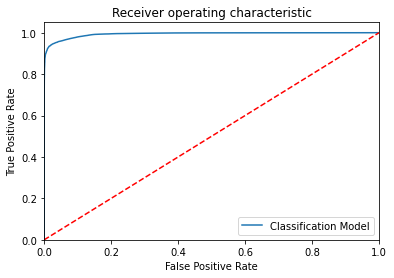

-----------------------------------------------------------------------------------------------------


In [35]:
    # To build the 'Random forest' model Random sampling - Hyperparameter tuning with RandomizedSearchCV  

from sklearn.ensemble import RandomForestClassifier

ModelRF = RandomForestClassifier(n_estimators=100,criterion='gini', max_depth=None,min_samples_split=2,min_samples_leaf=1,
                                 min_weight_fraction_leaf=0.0,max_features='sqrt',min_impurity_decrease=0.0,
                                 bootstrap=True,oob_score=False,n_jobs=None,random_state=None,verbose=0,warm_start=False,
                                 class_weight=None,ccp_alpha=0.0,max_samples=None)

# Train the model with train data 

ModelRF.fit(x_train,y_train)

# Predict the model with test data set

y_pred = ModelRF.predict(x_test)
y_pred_prob = ModelRF.predict_proba(x_test)

# Confusion matrix in sklearn

from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

# actual values

actual = y_test

# predicted values

predicted = y_pred

# confusion matrix

matrix = confusion_matrix(actual,predicted, labels=[1,0],sample_weight=None, normalize=None)
print('Confusion matrix : \n', matrix)

# outcome values order in sklearn

tp, fn, fp, tn = confusion_matrix(actual,predicted,labels=[1,0]).reshape(-1)
print('Outcome values : \n', tp, fn, fp, tn)

# classification report for precision, recall f1-score and accuracy

C_Report = classification_report(actual,predicted,labels=[1,0])

print('Classification report : \n', C_Report)

# calculating the metrics

sensitivity = round(tp/(tp+fn), 3);
specificity = round(tn/(tn+fp), 3);
accuracy = round((tp+tn)/(tp+fp+tn+fn), 3);
balanced_accuracy = round((sensitivity+specificity)/2, 3);
precision = round(tp/(tp+fp), 3);
f1Score = round((2*tp/(2*tp + fp + fn)), 3);

# Matthews Correlation Coefficient (MCC). Range of values of MCC lie between -1 to +1. 
# A model with a score of +1 is a perfect model and -1 is a poor model

from math import sqrt

mx = (tp+fp) * (tp+fn) * (tn+fp) * (tn+fn)
MCC = round(((tp * tn) - (fp * fn)) / sqrt(mx), 3)

print('Accuracy :', round(accuracy*100, 2),'%')
print('Precision :', round(precision*100, 2),'%')
print('Recall :', round(sensitivity*100,2), '%')
print('F1 Score :', f1Score)
print('Specificity or True Negative Rate :', round(specificity*100,2), '%'  )
print('Balanced Accuracy :', round(balanced_accuracy*100, 2),'%')
print('MCC :', MCC)

# Area under ROC curve 

from sklearn.metrics import roc_curve, roc_auc_score

print('roc_auc_score:', round(roc_auc_score(y_test, y_pred), 3))

# ROC Curve

from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc = roc_auc_score(y_test, y_pred)
fpr, tpr, thresholds = roc_curve(y_test,ModelRF.predict_proba(x_test)[:,1])
plt.figure()
# plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot(fpr, tpr, label= 'Classification Model' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show() 
print('-----------------------------------------------------------------------------------------------------')
#----------------------------------------------------------------------------------------------------------
new_row = {'Model Name' : ModelRF,
           'True Positive': tp,
           'False Negative': fn, 
           'False Positive': fp, 
           'True Negative': tn,
           'Accuracy' : accuracy,
           'Precision' : precision,
           'Recall' : sensitivity,
           'F1 Score' : f1Score,
           'Specificity' : specificity,
           'MCC':MCC,
           'ROC_AUC_Score':roc_auc_score(y_test, y_pred),
           'Balanced Accuracy':balanced_accuracy}
HTResults = HTResults.append(new_row, ignore_index=True)
#----------------------------------------------------------------------------------------------------------

In [36]:
HTResults.head()

,Model Name,True Positive,False Negative,False Positive,True Negative,Accuracy,Precision,Recall,F1 Score,Specificity,MCC,ROC_AUC_Score,Balanced Accuracy
0,"(DecisionTreeClassifier(max_features='sqrt', r...",10745,658,322,14251,0.962,0.971,0.942,0.956,0.978,0.923,0.9601,0.96


In [37]:
from sklearn.model_selection import GridSearchCV
import lightgbm as lgb

# Create the parameter grid based on the results of random search 

Grid_Params = {'max_depth': [2, 3, 5, 10, 20],
               'min_samples_leaf': [5, 10, 20, 50, 100],
               'criterion': ["gini", "entropy"]
               }
ModelLGB = lgb.LGBMClassifier()

# Instantiate the grid search model

Grid_search = GridSearchCV(estimator=ModelLGB, param_grid=Grid_Params, cv=3, n_jobs=-1, verbose=2)

# Fit the grid search to the data

Grid_search.fit(x_train,y_train)

Fitting 3 folds for each of 50 candidates, totalling 150 fits
[LightGBM] [Warning] Unknown parameter: criterion
[LightGBM] [Warning] min_data_in_leaf is set with min_child_samples=20, will be overridden by min_samples_leaf=5. Current value: min_data_in_leaf=5


GridSearchCV(cv=3, estimator=LGBMClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [2, 3, 5, 10, 20],
                         'min_samples_leaf': [5, 10, 20, 50, 100]},
             verbose=2)

In [38]:
# Best parameter from gridseachCV

Grid_search.best_params_

{'criterion': 'gini', 'max_depth': 20, 'min_samples_leaf': 5}

Confusion matrix : 
 [[10755   648]
 [  292 14281]]
Outcome values : 
 10755 648 292 14281
Classification report : 
               precision    recall  f1-score   support

           1       0.97      0.94      0.96     11403
           0       0.96      0.98      0.97     14573

    accuracy                           0.96     25976
   macro avg       0.97      0.96      0.96     25976
weighted avg       0.96      0.96      0.96     25976

Accuracy : 96.4 %
Precision : 97.4 %
Recall : 94.3 %
F1 Score : 0.958
Specificity or True Negative Rate : 98.0 %
Balanced Accuracy : 96.2 %
MCC : 0.927
roc_auc_score: 0.962


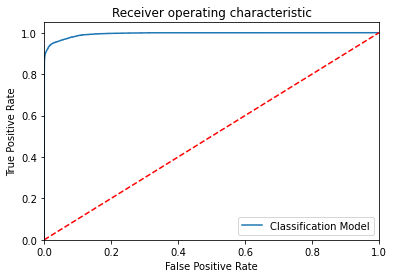

-----------------------------------------------------------------------------------------------------


In [39]:
# To build the 'Decision Tree' model Random sampling - Hyperparameter tuning with GridSearchCV  

import lightgbm as lgb

ModelLGB = lgb.LGBMClassifier()

# Train the model with train data 

ModelLGB.fit(x_train,y_train)

# Predict the model with test data set

y_pred = ModelLGB.predict(x_test)
y_pred_prob = ModelLGB.predict_proba(x_test)

# Confusion matrix in sklearn

from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

# actual values

actual = y_test

# predicted values

predicted = y_pred

# confusion matrix

matrix = confusion_matrix(actual,predicted, labels=[1,0],sample_weight=None, normalize=None)
print('Confusion matrix : \n', matrix)

# outcome values order in sklearn

tp, fn, fp, tn = confusion_matrix(actual,predicted,labels=[1,0]).reshape(-1)
print('Outcome values : \n', tp, fn, fp, tn)

# classification report for precision, recall f1-score and accuracy

C_Report = classification_report(actual,predicted,labels=[1,0])

print('Classification report : \n', C_Report)

# calculating the metrics

sensitivity = round(tp/(tp+fn), 3);
specificity = round(tn/(tn+fp), 3);
accuracy = round((tp+tn)/(tp+fp+tn+fn), 3);
balanced_accuracy = round((sensitivity+specificity)/2, 3);
precision = round(tp/(tp+fp), 3);
f1Score = round((2*tp/(2*tp + fp + fn)), 3);

# Matthews Correlation Coefficient (MCC). Range of values of MCC lie between -1 to +1. 
# A model with a score of +1 is a perfect model and -1 is a poor model

from math import sqrt

mx = (tp+fp) * (tp+fn) * (tn+fp) * (tn+fn)
MCC = round(((tp * tn) - (fp * fn)) / sqrt(mx), 3)

print('Accuracy :', round(accuracy*100, 2),'%')
print('Precision :', round(precision*100, 2),'%')
print('Recall :', round(sensitivity*100,2), '%')
print('F1 Score :', f1Score)
print('Specificity or True Negative Rate :', round(specificity*100,2), '%'  )
print('Balanced Accuracy :', round(balanced_accuracy*100, 2),'%')
print('MCC :', MCC)

# Area under ROC curve 

from sklearn.metrics import roc_curve, roc_auc_score

print('roc_auc_score:', round(roc_auc_score(y_test, y_pred), 3))

# ROC Curve

from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc = roc_auc_score(y_test, y_pred)
fpr, tpr, thresholds = roc_curve(y_test,ModelLGB.predict_proba(x_test)[:,1])
plt.figure()
# plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot(fpr, tpr, label= 'Classification Model' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show() 
print('-----------------------------------------------------------------------------------------------------')
#----------------------------------------------------------------------------------------------------------
new_row = {'Model Name' : ModelLGB,
           'True Positive': tp,
           'False Negative': fn, 
           'False Positive': fp, 
           'True Negative': tn,
           'Accuracy' : accuracy,
           'Precision' : precision,
           'Recall' : sensitivity,
           'F1 Score' : f1Score,
           'Specificity' : specificity,
           'MCC':MCC,
           'ROC_AUC_Score':roc_auc_score(y_test, y_pred),
           'Balanced Accuracy':balanced_accuracy}
HTResults = HTResults.append(new_row, ignore_index=True)
#----------------------------------------------------------------------------------------------------------

In [40]:
HTResults.head()

,Model Name,True Positive,False Negative,False Positive,True Negative,Accuracy,Precision,Recall,F1 Score,Specificity,MCC,ROC_AUC_Score,Balanced Accuracy
0,"(DecisionTreeClassifier(max_features='sqrt', r...",10745,658,322,14251,0.962,0.971,0.942,0.956,0.978,0.923,0.9601,0.96
1,LGBMClassifier(),10755,648,292,14281,0.964,0.974,0.943,0.958,0.98,0.927,0.961568,0.962


In [42]:
y_pred = ModelLGB.predict(x_train)
y_pred

array([0, 0, 1, ..., 0, 0, 0])

In [43]:

PredResults1 = pd.DataFrame({' Pred_Satisfaction':y_pred})

# Merge two Dataframes on index of both the dataframes


TestDataResults1 = train_bk.merge(PredResults1, left_index=True, right_index=True)
TestDataResults1 = TestDataResults1.drop(['Unnamed: 0', 'Gender', 'Customer Type', 'Age', 'Type of Travel',
       'Class', 'Flight Distance', 'Inflight wifi service',
       'Departure/Arrival time convenient', 'Ease of Online booking',
       'Gate location', 'Food and drink', 'Online boarding', 'Seat comfort',
       'Inflight entertainment', 'On-board service', 'Leg room service',
       'Baggage handling', 'Checkin service', 'Inflight service',
       'Cleanliness', 'Departure Delay in Minutes',
       'Arrival Delay in Minutes'], axis=1)
TestDataResults1 = TestDataResults1.rename(columns = {'satisfaction': 'Actual_Satisfaction'}, inplace = False)
TestDataResults1.head(10)

,id,Actual_Satisfaction,Pred_Satisfaction
0,70172,0,0
1,5047,0,0
2,110028,1,1
3,24026,0,0
4,119299,1,1
5,111157,0,0
6,82113,0,0
7,96462,1,1
8,79485,0,0
9,65725,0,0


In [44]:
df = pd.concat([train,test])
df

,Unnamed: 0,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,ADM,satisfaction
0,0,70172,1,0,13,1,2,460,3,4,3,1,5,3,5,5,4,3,4,4,5,5,25,18.0,0
1,1,5047,1,1,25,0,0,235,3,2,3,3,1,3,1,1,1,5,3,1,4,1,1,6.0,0
2,2,110028,0,0,26,0,0,1142,2,2,2,2,5,5,5,5,4,3,4,4,4,5,0,0.0,1
3,3,24026,0,0,25,0,0,562,2,5,5,5,2,2,2,2,2,5,3,1,4,2,11,9.0,0
4,4,119299,1,0,61,0,0,214,3,3,3,3,4,5,5,3,3,4,4,3,3,3,0,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25971,25971,78463,1,1,34,0,0,526,3,3,3,1,4,3,4,4,3,2,4,4,5,4,0,0.0,0
25972,25972,71167,1,0,23,0,0,646,4,4,4,4,4,4,4,4,4,5,5,5,5,4,0,0.0,1
25973,25973,37675,0,0,17,1,1,828,2,5,1,5,2,1,2,2,4,3,4,5,4,2,0,0.0,0
25974,25974,90086,1,0,14,0,0,1127,3,3,3,3,4,4,4,4,3,2,5,4,5,4,0,0.0,1


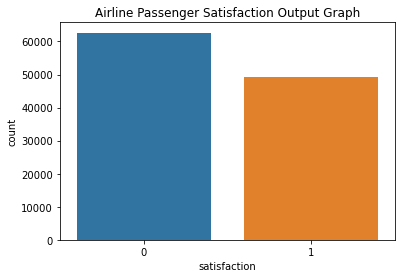

In [45]:
import seaborn as sns
sns.countplot(x='satisfaction', data=df)
plt.title("Airline Passenger Satisfaction Output Graph")
plt.show()

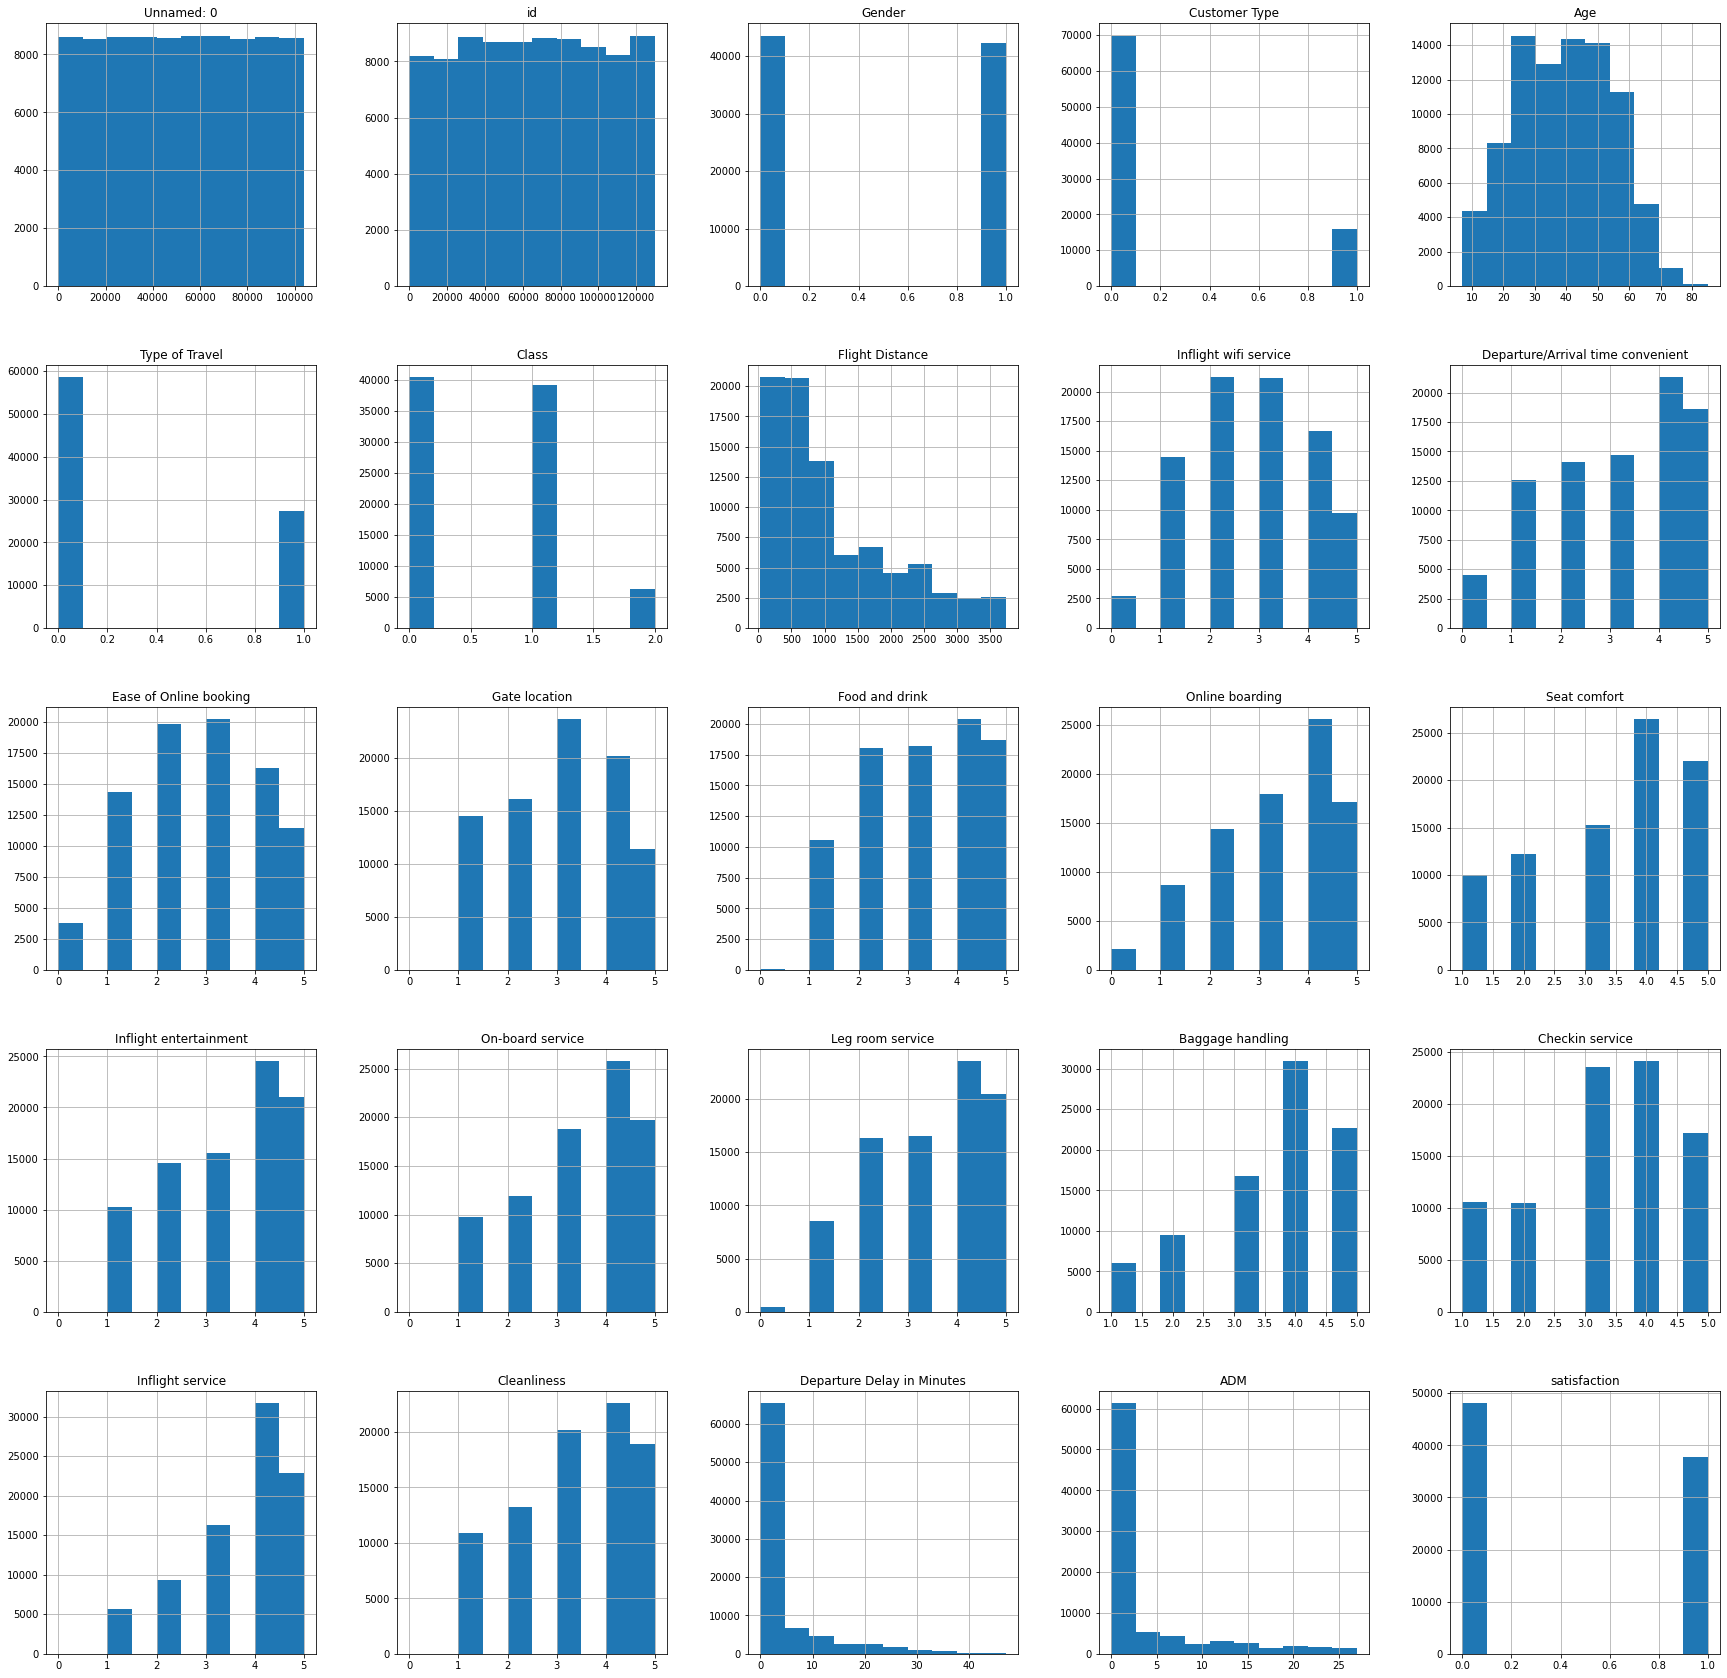

In [46]:
train.hist(figsize=(30,30))
plt.show()

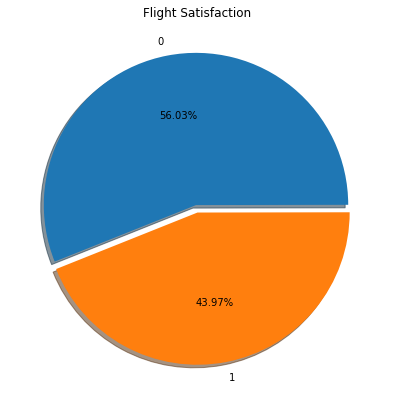

(0, 25) (0, 25)


In [47]:
def draw_pie_plot(column, title, **kvargs):
    explode = np.zeros(len(column.unique()))
    explode[:-1] = 0.05
    
    column.value_counts().plot(
        kind='pie',
        title=title, 
        ylabel="",  
        autopct='%1.2f%%', 
        explode=explode, 
        shadow=True,
        startangle=0.1,
        **kvargs
    )
draw_pie_plot(df['satisfaction'], "Flight Satisfaction", figsize=(7, 7))
plt.show()

satisfied = df[df['satisfaction'] == 'satisfied']
dissatisfied = df[df['satisfaction'] == 'neutral or dissatisfied']

print(satisfied.shape, dissatisfied.shape)

In [48]:
TestDataResults1.to_csv(r"C:\Users\Chandra Shekhar\Documents\Internship\internProject\Submission.csv", index = False)